In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas.io.data import DataReader

C:\Users\user\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()

start=datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [9]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,105.309087,106.372302,104.229325,105.329484,4.557822e+07,103.873776
std,8.492980,8.544984,8.386577,8.470700,2.031302e+07,7.922684
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.215000,98.205000,96.427500,97.137499,3.217352e+07,96.300820
50%,105.550000,106.475002,104.849998,105.775002,4.041390e+07,104.469563
75%,112.172499,113.359999,110.805002,112.450002,5.310688e+07,110.414452
max,123.129997,123.820000,121.620003,122.570000,1.622063e+08,120.004194


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-08-07 to 2016-08-05
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


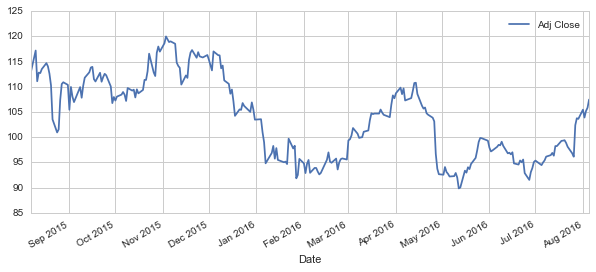

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

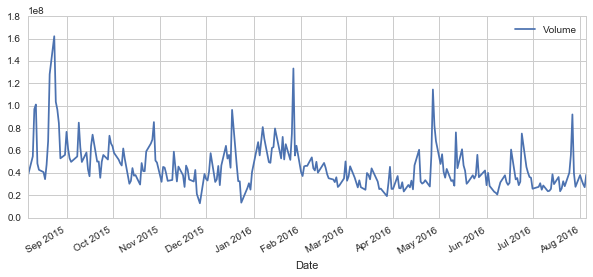

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


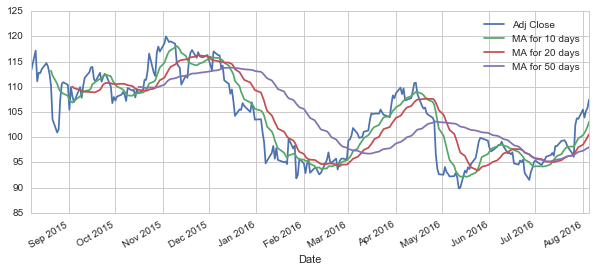

In [14]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

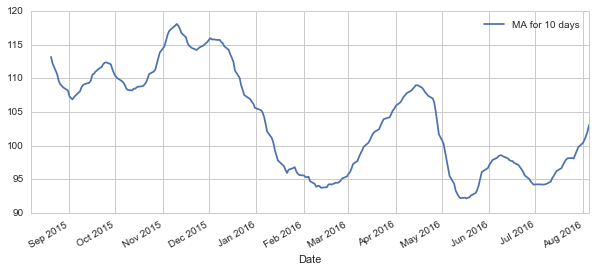

In [17]:
AAPL['MA for 10 days'].plot(legend=True, figsize=(10,4))

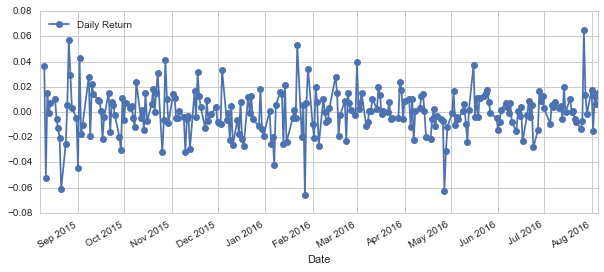

In [18]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(marker='o',legend=True,figsize=(10,4))

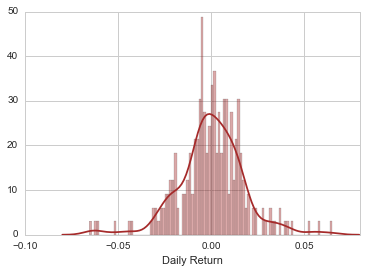

In [19]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='brown')

In [20]:
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [21]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-07,113.101772,522.619995,635.299988,45.476046
2015-08-10,117.213856,524.000000,633.729980,46.050091
2015-08-11,111.114268,527.460022,660.780029,45.154968
2015-08-12,112.827634,525.909973,659.559998,45.476046
2015-08-13,112.739522,529.659973,656.450012,45.466314


In [22]:
tech_rets=closing_df.pct_change()

In [23]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-07,NaN,NaN,NaN,NaN
2015-08-10,0.036357,0.002641,-0.002471,0.012623
2015-08-11,-0.052038,0.006603,0.042684,-0.019438
2015-08-12,0.015420,-0.002939,-0.001846,0.007111
2015-08-13,-0.000781,0.007130,-0.004715,-0.000214


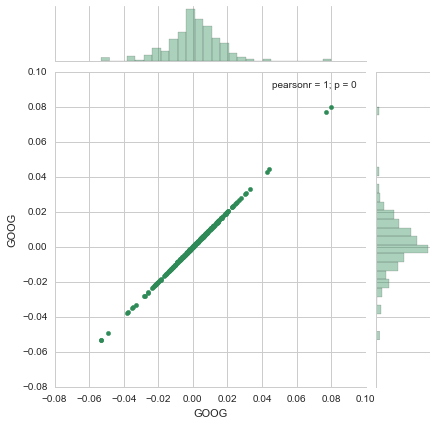

In [24]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

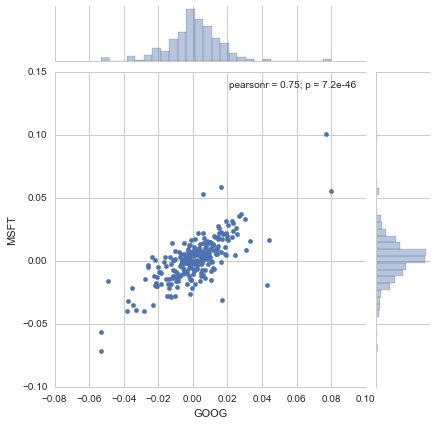

In [25]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [26]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-07,NaN,NaN,NaN,NaN
2015-08-10,0.036357,0.002641,-0.002471,0.012623
2015-08-11,-0.052038,0.006603,0.042684,-0.019438
2015-08-12,0.015420,-0.002939,-0.001846,0.007111
2015-08-13,-0.000781,0.007130,-0.004715,-0.000214


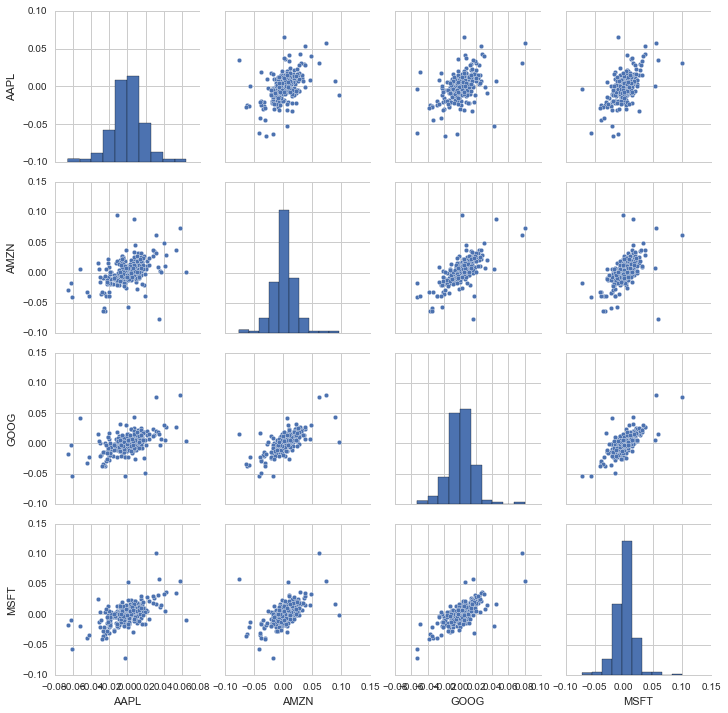

In [27]:
sns.pairplot(tech_rets.dropna())

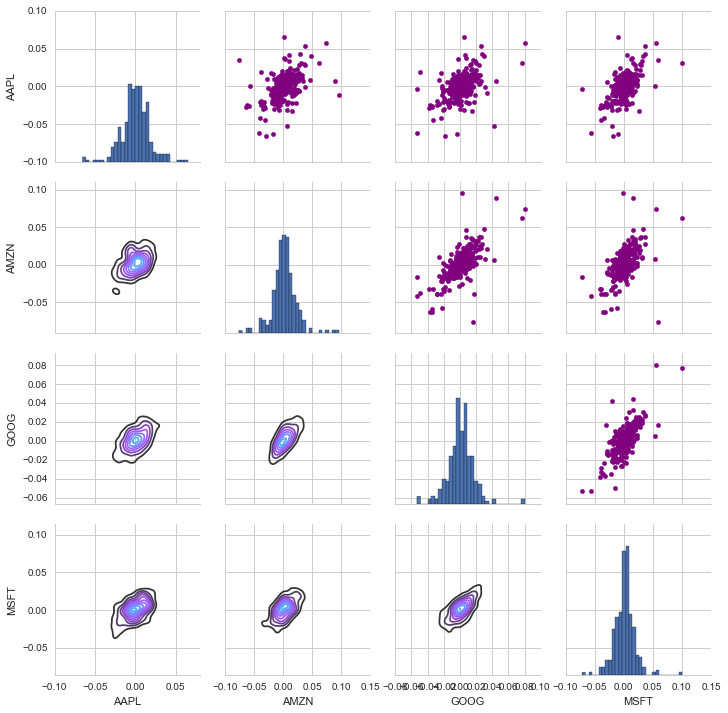

In [28]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

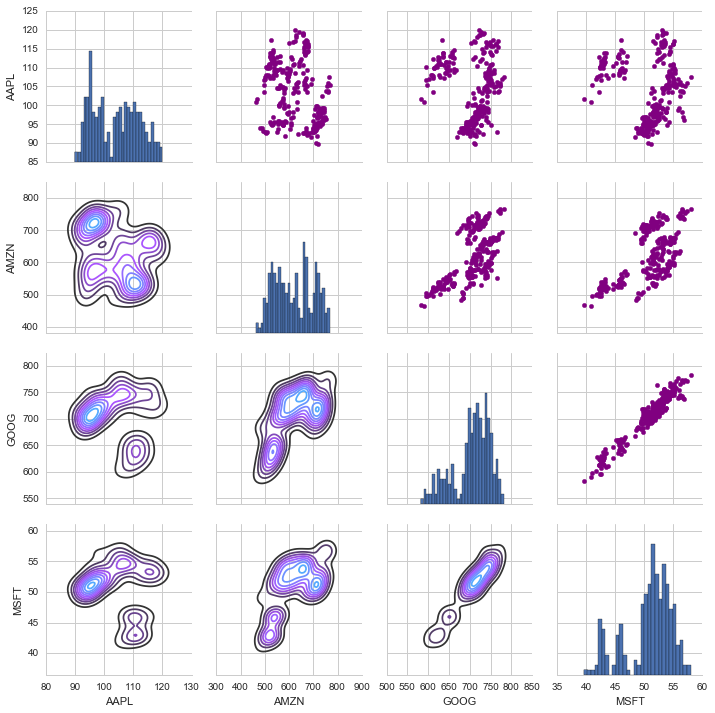

In [29]:
returns_fig=sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

C:\Users\user\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\user\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


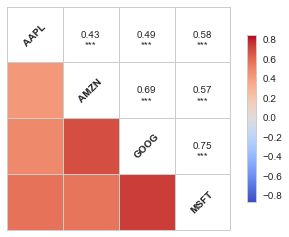

In [30]:
sns.corrplot(tech_rets.dropna(),annot=True)

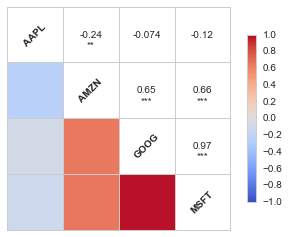

In [31]:
sns.corrplot(closing_df,annot=True)

In [32]:
rets=tech_rets.dropna()

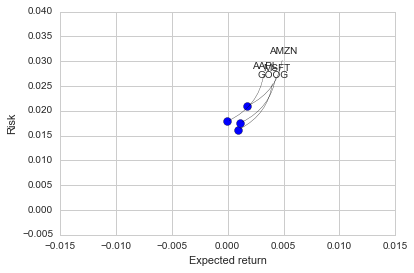

In [33]:
area=np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

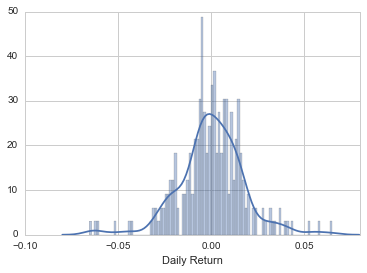

In [35]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [36]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-10,0.036357,0.002641,-0.002471,0.012623
2015-08-11,-0.052038,0.006603,0.042684,-0.019438
2015-08-12,0.015420,-0.002939,-0.001846,0.007111
2015-08-13,-0.000781,0.007130,-0.004715,-0.000214
2015-08-14,0.007034,0.003512,0.001021,0.005778


In [37]:
rets['AAPL'].quantile(0.05)

-0.026888661521899226

In [39]:
days = 365

dt=1/days

mu=rets.mean()['GOOG']

sigma=rets.std()['GOOG']


In [40]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in xrange(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

In [41]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-07,640.229980,642.679993,629.710022,635.299988,1403900,635.299988
2015-08-10,639.479980,643.440002,631.249023,633.729980,1809200,633.729980
2015-08-11,669.200012,674.900024,654.270020,660.780029,5029200,660.780029
2015-08-12,663.080017,665.000000,652.289978,659.559998,2936700,659.559998
2015-08-13,659.322021,664.500000,651.661011,656.450012,1810700,656.450012


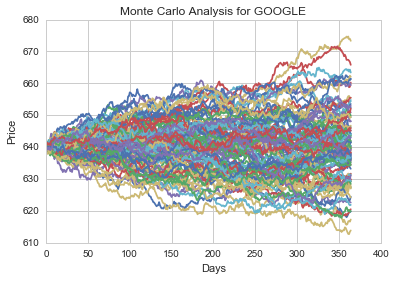

In [43]:
start_price=640.23

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for GOOGLE')

In [44]:
runs=10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

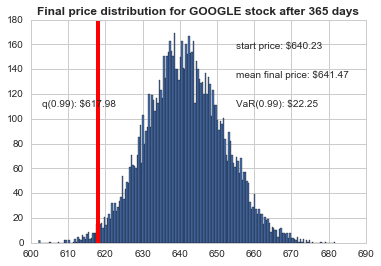

In [46]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s="start price: $%.2f" %start_price)
plt.figtext(0.6,0.7,"mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price-q))
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)
plt.axvline(x=q,linewidth=4, color='r')
plt.title(u"Final price distribution for GOOGLE stock after %s days" % days, weight='bold')